**<h1 align=center><font size = 5>Wine Quality Prediction with Multi-Output Artificial Neural Networks</font></h1>**

<br>

<img src="https://learn.winecoolerdirect.com/wp-content/uploads/2015/07/red-wine.jpg" alt="wine">

<small>Picture Source:<a href="https://learn.winecoolerdirect.com/red-wine/"> Wine Cooler Direct</a></small>

<br>

<h2>Data Set Information:</h2>

<p>The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: <a href="https://www.vinhoverde.pt/en/">Web Link</a> or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.</p>

<br>

<h2>Attribute Information</h2>

<p>For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests):</p>

<ol>
  <li>fixed acidity</li>
  <li>volatile acidity</li>
  <li>citric acid</li>
  <li>residual sugar</li>
  <li>chlorides</li>
  <li>free sulfur dioxide</li>
  <li>total sulfur dioxide</li>
  <li>density</li>
  <li>pH</li>
  <li>sulphates</li>
  <li>alcohol</li>
  <li><b>Output variable (based on sensory data): quality (score between 0 and 10)</b></li>
</ol>

<br>

<h2>Acknowledgements</h2>

<p>This dataset has been referred from <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">archive.ics.uci.edu</a>.</p>

<br>

<h2>Relevant Papers</h2>

<p>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Available at: <a href="https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub">sciencedirect.com</a></p>

<br>

<h2>Keywords</h2> 

<ul>
	<li>Wine</li>
	<li>Machine Learning</li>
	<li>Quality Test</li>
	<li>Artifical Neural Networks</li>
	<li>Multi-output Model</li>
</ul> 

<br>

<h1>Objective for this Notebook</h1>

<p>Within the scope of this project, first we understand the Dataset & cleanup (if required). After that, we had tried to predict <code>target</code> score based on independent variables.</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#importing_libraries">Importing Libraries</a></li>
<li><a href="https://#data_preprocessing">Data Preprocessing</a></li>
<li><a href="https://#build_fit_model">Build and Fit the Model</a></li>
<li><a href="https://#analize_model">Analize the Model</a></li>
<li><a href="https://#save_model">Saving the Model</a></li>

<br>

<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<br>

<a id="importing_libraries"></a>

<h2 align=center>Importing Libraries</h2>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  get_ipython().run_line_magic('tensorflow_version', '2.x')
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

<br>

<a id="data_preprocessing"></a>

<h2 align=center>Data Preprocessing</h2>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2022-12-28 14:38:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.09s   

2022-12-28 14:38:57 (892 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2022-12-28 14:38:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  1.30MB/s    in 0.2s    

2022-12-28 14:38:57 (1.30 MB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [ ]:
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')

In [ ]:
df_red["is_red"] = 1

In [ ]:
df_white = pd.read_csv('/content/winequality-white.csv', sep=';')

In [ ]:
df_white["is_red"] = 0

<p>As we can see from the bottom, quality dataset is imbalanced. To solve this problem, we can make 3 different variables. Quality between 3-5 are low, 6-7 are mid, 8-9 are high quality. For low quality wines, we can call them as 0, for mid quality 1 and lastly for the good quality wines we can call them as 2.</p>

In [ ]:
df_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
bins = [0, 5.5, 7.5, 10] # 3-5 are low, 6-7 are mid, 8-9 are high quality
labels = [0, 1, 2]
df_red['target'] = pd.cut(df_red['quality'], bins=bins, labels=labels)
df_white['target'] = pd.cut(df_white['quality'], bins=bins, labels=labels)

In [ ]:
df_white["target"].unique()

[1, 0, 2]
Categories (3, int64): [0 < 1 < 2]

In [ ]:
df_red["target"].unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

In [ ]:
df_white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0,1


In [ ]:
df_red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1,0


In [ ]:
print("Number of NaN values: {} as red type.".format(df_red.isnull().sum().sum()))
print("Number of duplicated rows: {} as red type.".format(df_red.duplicated().sum()))
print("\nDropping duplicated rows...\n")

dp = df_red[df_red.duplicated(keep=False)]
df_red.drop_duplicates(inplace= True)
print("Number of duplicated rows: {}.".format(df_red.duplicated().sum()))

Number of NaN values: 0 as red type.
Number of duplicated rows: 240 as red type.

Dropping duplicated rows...

Number of duplicated rows: 0.


In [ ]:
print("Number of NaN values: {} as white type.".format(df_white.isnull().sum().sum()))
print("Number of duplicated rows: {} as white type.".format(df_white.duplicated().sum()))
print("\nDropping duplicated rows...\n")

dp = df_white[df_white.duplicated(keep=False)]
df_white.drop_duplicates(inplace= True)
print("Number of duplicated rows: {}.".format(df_white.duplicated().sum()))

Number of NaN values: 0 as white type.
Number of duplicated rows: 937 as white type.

Dropping duplicated rows...

Number of duplicated rows: 0.


In [ ]:
df = pd.concat([df_red, df_white], ignore_index=True)
df = df.iloc[np.random.permutation(len(df))] # Shuffle them
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red,target
3990,6.4,0.210,0.34,16.05,0.040,56.0,142.0,0.99678,3.11,0.38,10.6,5,0,0
2024,6.4,0.460,0.08,4.90,0.046,34.0,144.0,0.99445,3.10,0.56,10.0,5,0,0
80,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,1,1
102,8.4,0.600,0.10,2.20,0.085,14.0,111.0,0.99640,3.15,0.66,9.8,5,1,0
249,7.5,0.400,0.12,3.00,0.092,29.0,53.0,0.99670,3.37,0.70,10.3,6,1,1
1134,7.2,0.835,0.00,2.00,0.166,4.0,11.0,0.99608,3.39,0.52,10.0,5,1,0
403,11.0,0.260,0.68,2.55,0.085,10.0,25.0,0.99700,3.18,0.61,11.8,5,1,0
5262,6.7,0.500,0.36,11.50,0.096,18.0,92.0,0.99642,3.11,0.49,9.6,5,0,0
4057,5.6,0.120,0.33,2.90,0.044,21.0,73.0,0.98896,3.17,0.32,12.9,8,0,2
1166,7.2,0.560,0.26,2.00,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5,1,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 3990 to 2078
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  is_red                5320 non-null   int64   
 13  target                5320 non-null   category
dtypes: category(1), float64(11), int64(2)
memory usage: 5

Text(0, 0.5, 'Frequency')

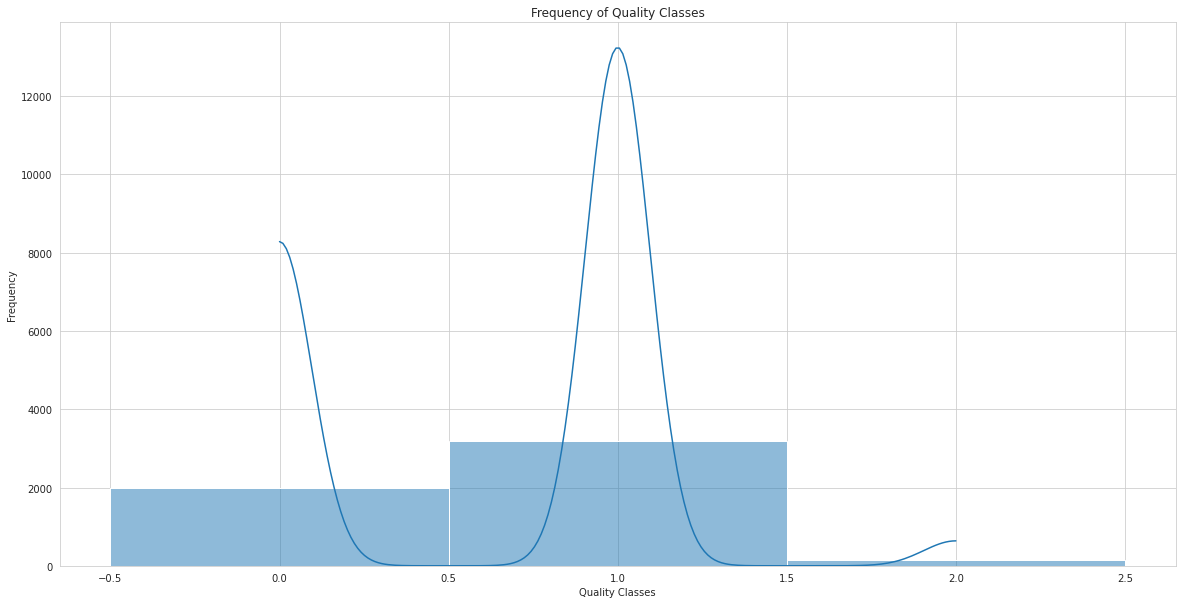

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('whitegrid')
sns.histplot(data=df['target'], kde=True)
plt.title("Frequency of Quality Classes")
plt.xlabel("Quality Classes")
plt.ylabel("Frequency")

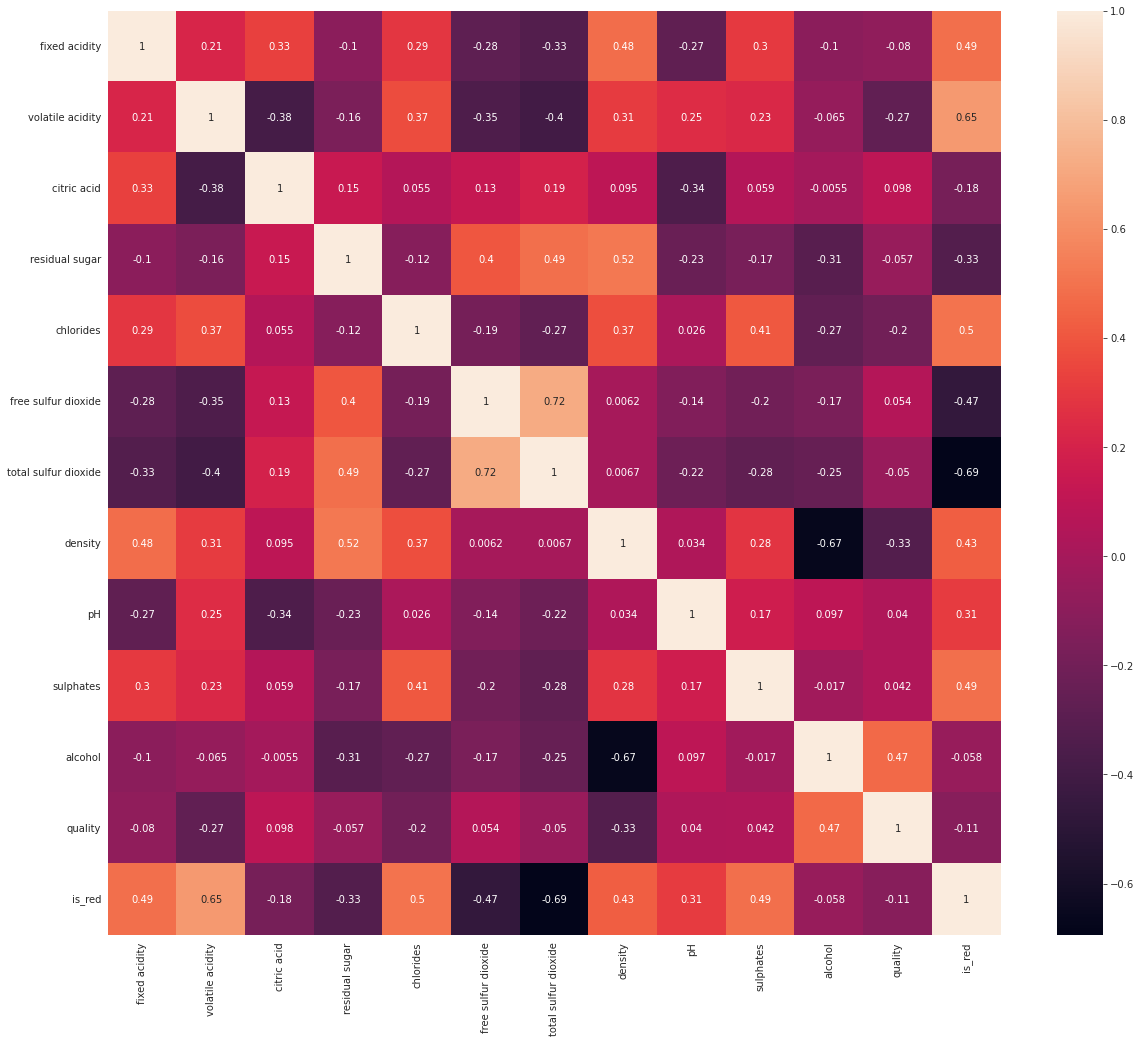

In [ ]:
plt.figure(figsize = (20, 17))
sns.heatmap(df.corr(), annot=True)

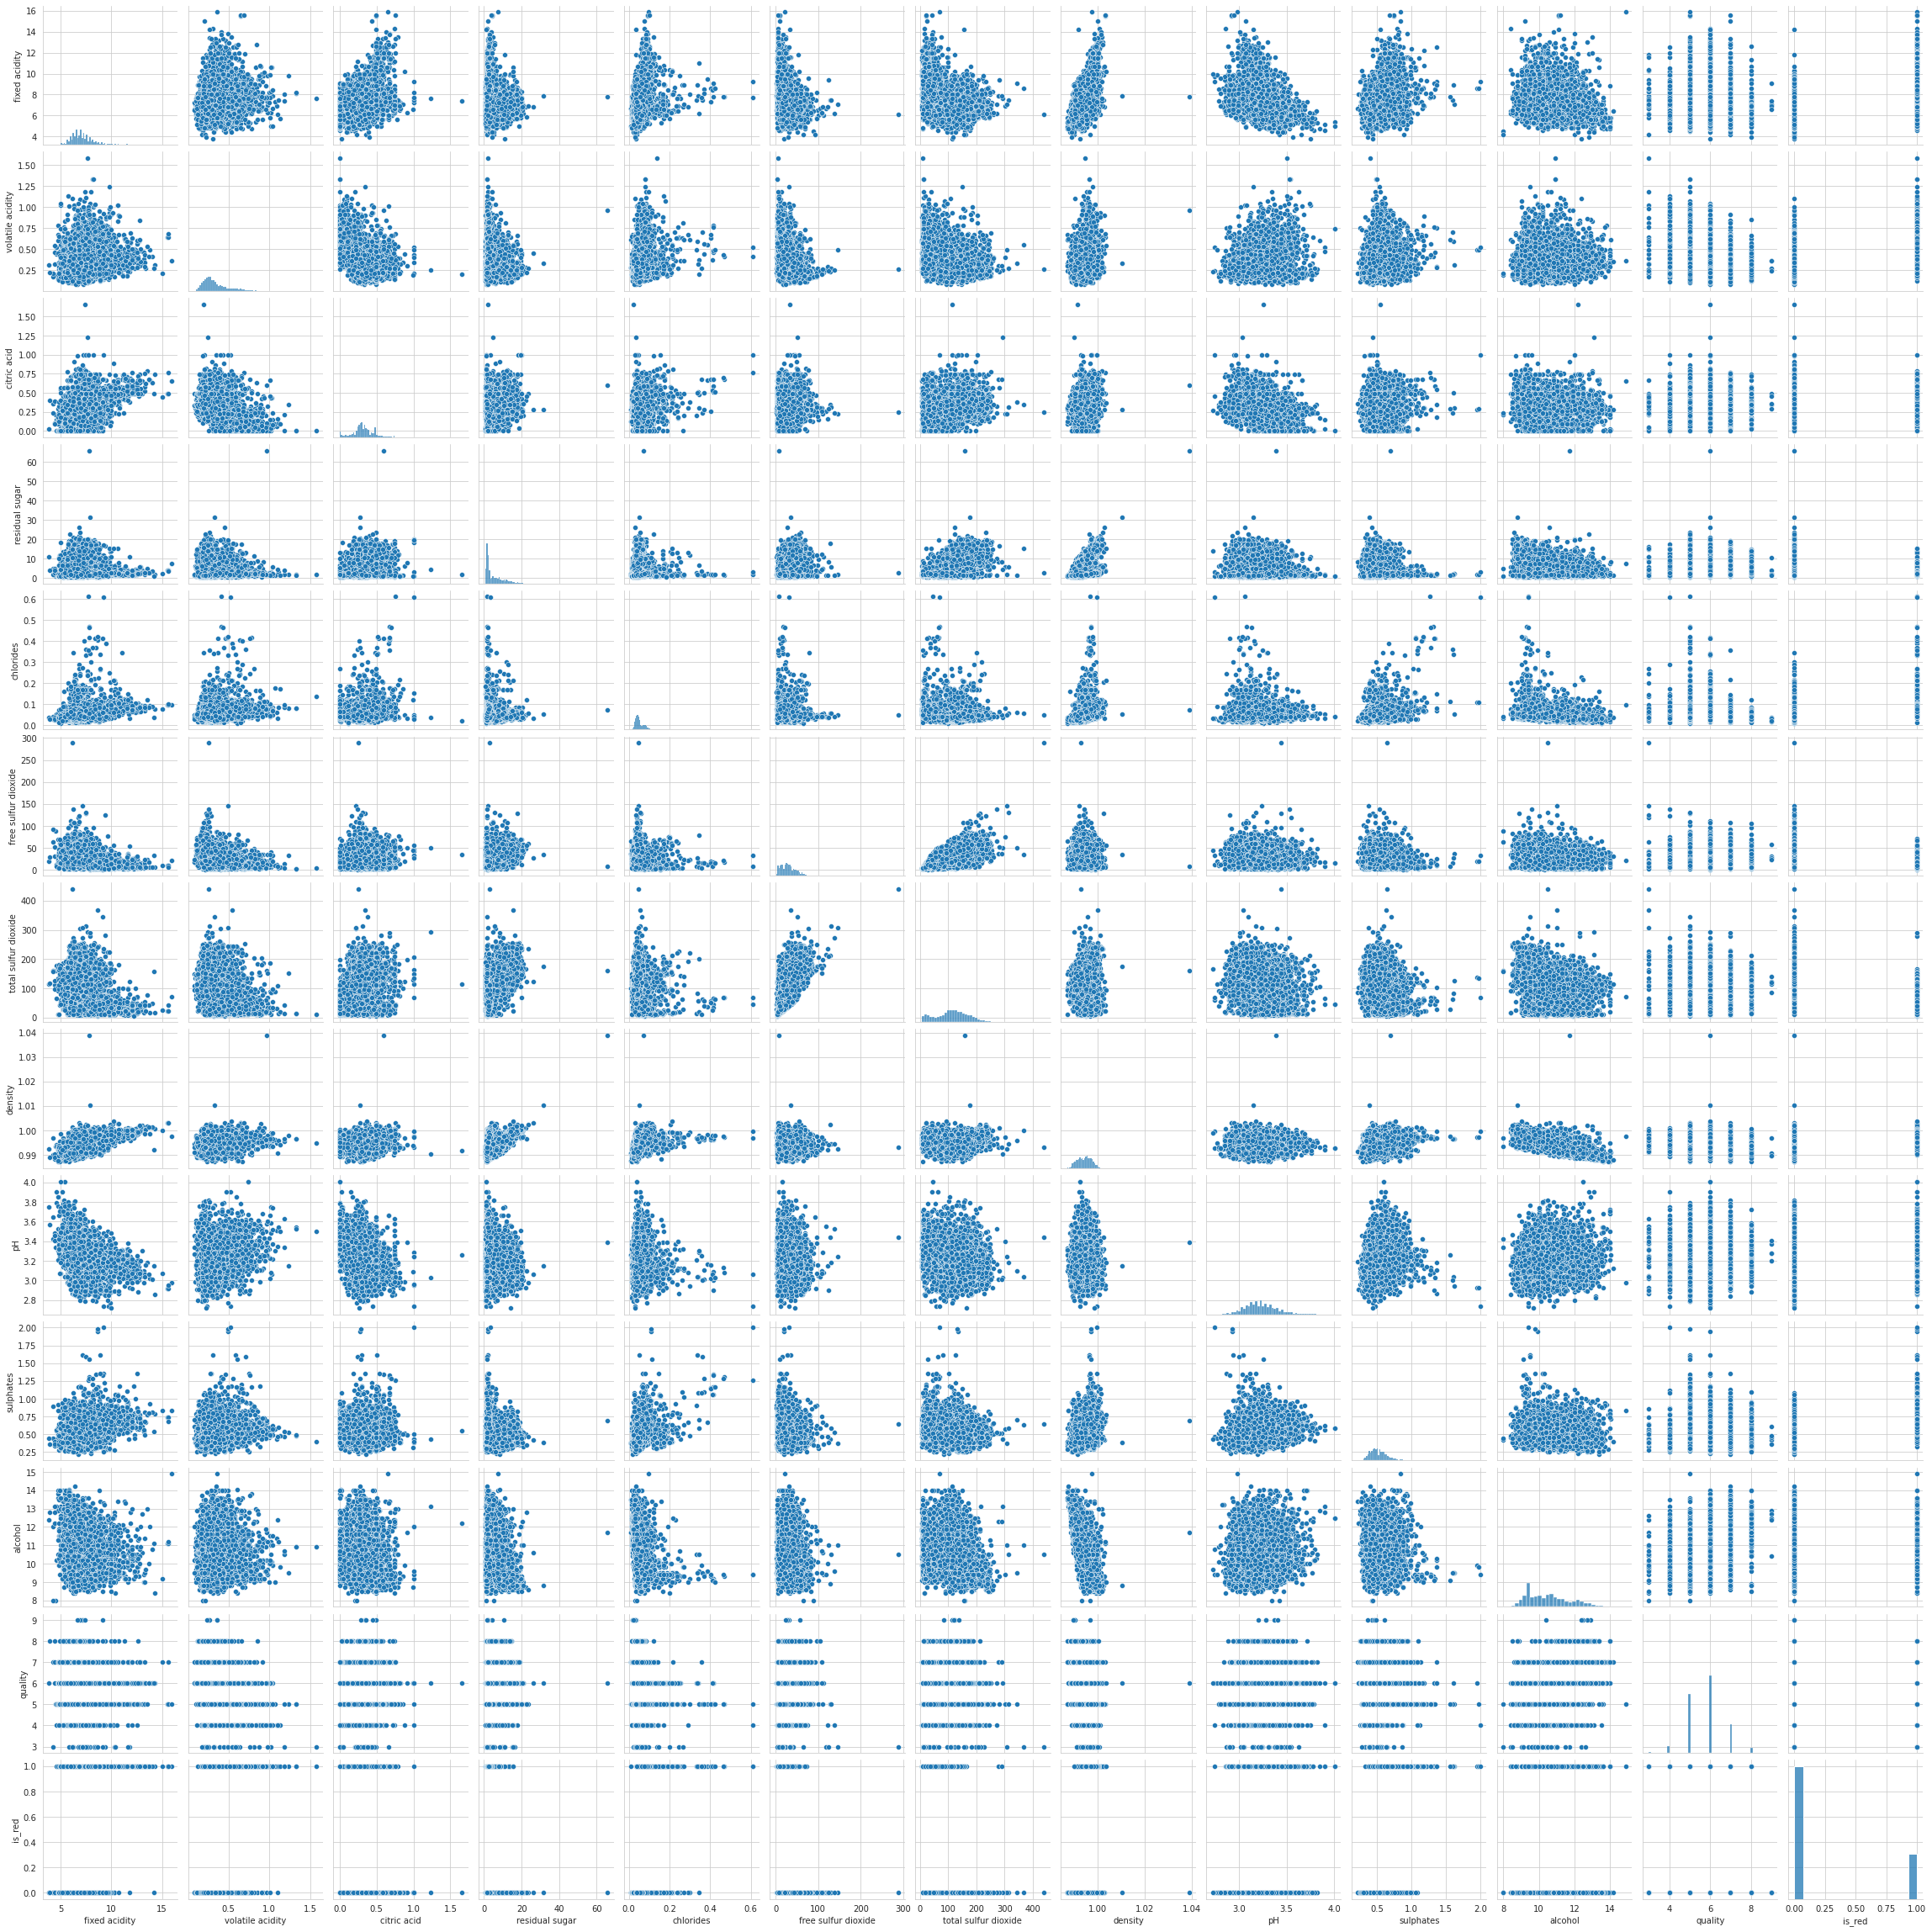

In [ ]:
sns.pairplot(df)
plt.show()

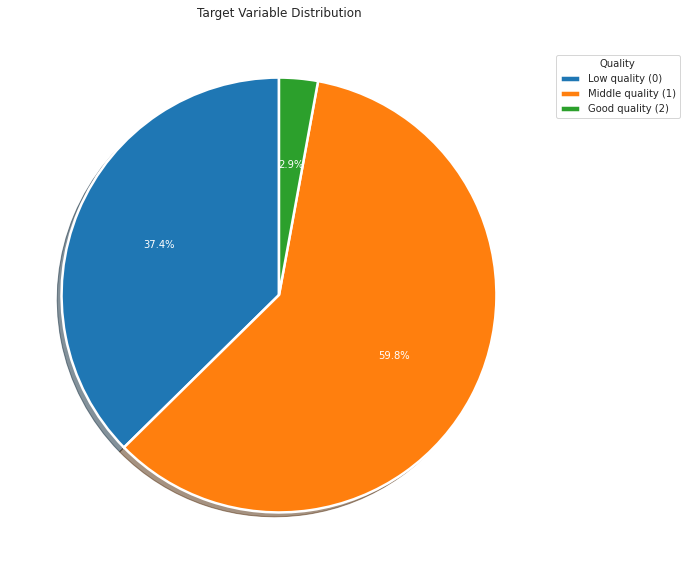

In [ ]:
import matplotlib.patheffects as path_effects

fig = plt.figure(figsize = (20, 10), facecolor='w')
out_df=pd.DataFrame(df.groupby('target')['target'].count())

patches, texts, autotexts = plt.pie(out_df['target'], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})
plt.title('Target Variable Distribution')
plt.legend(labels=["Low quality (0)", "Middle quality (1)", "Good quality (2)"], bbox_to_anchor=(1., .95), title="Quality")

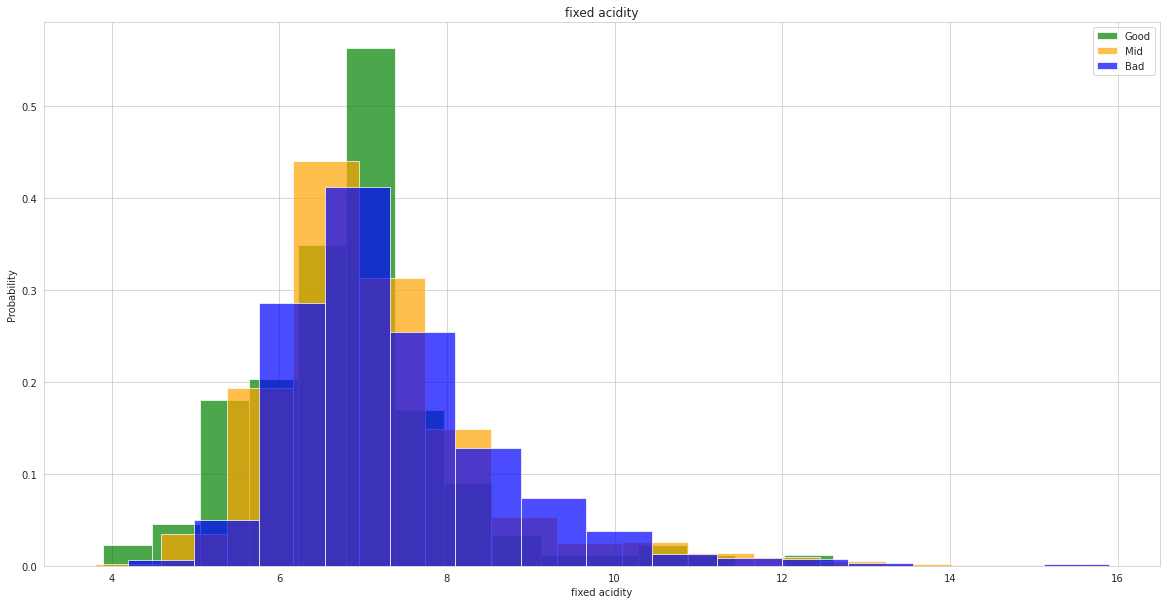

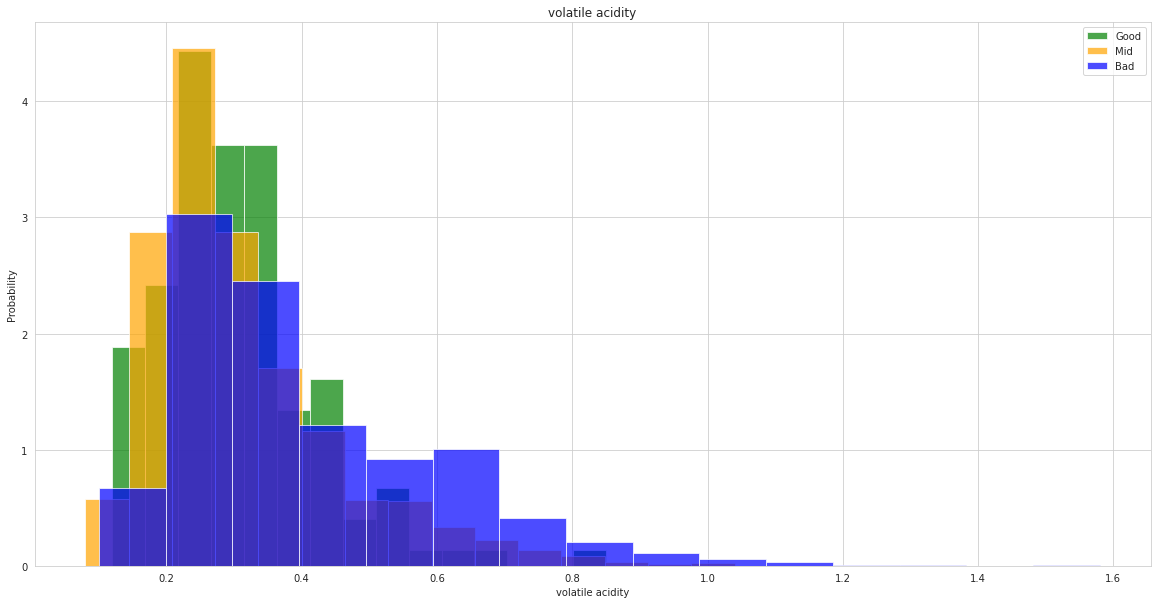

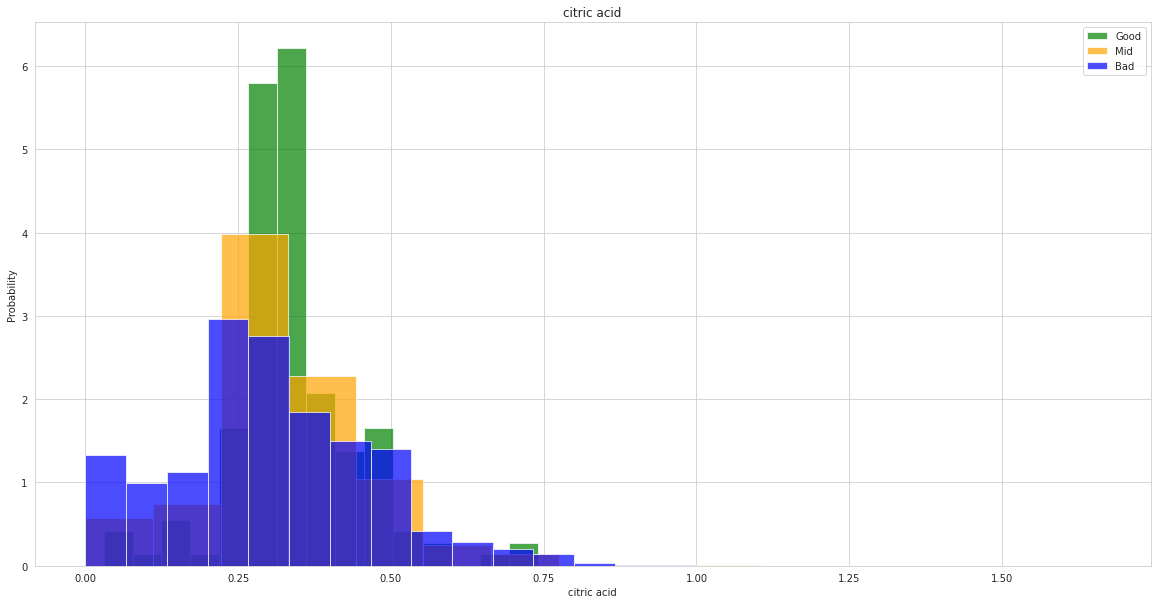

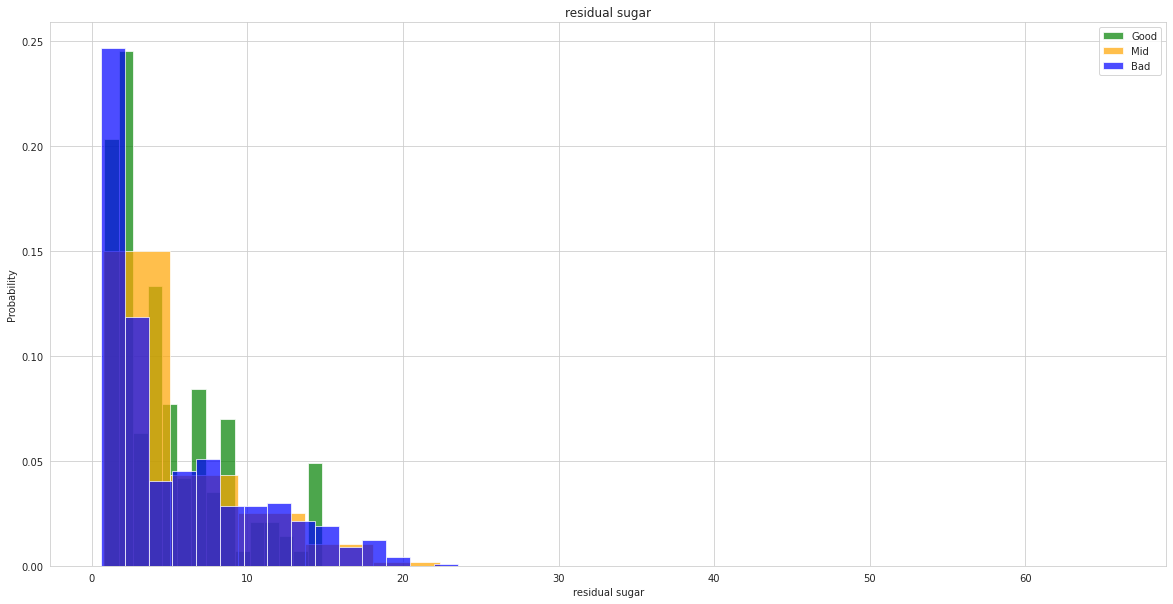

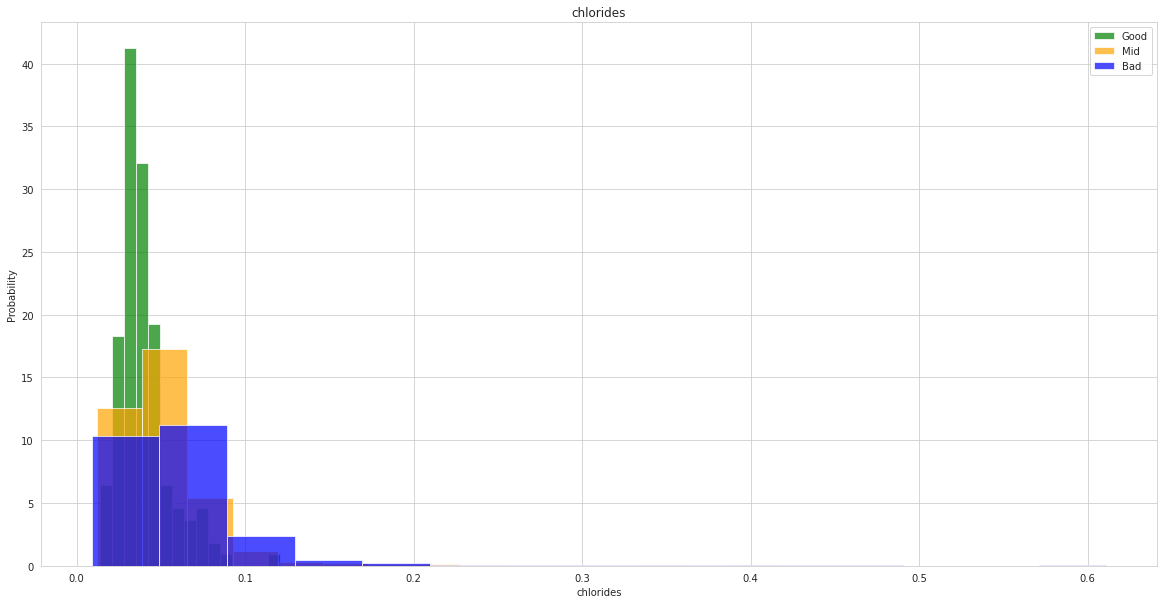

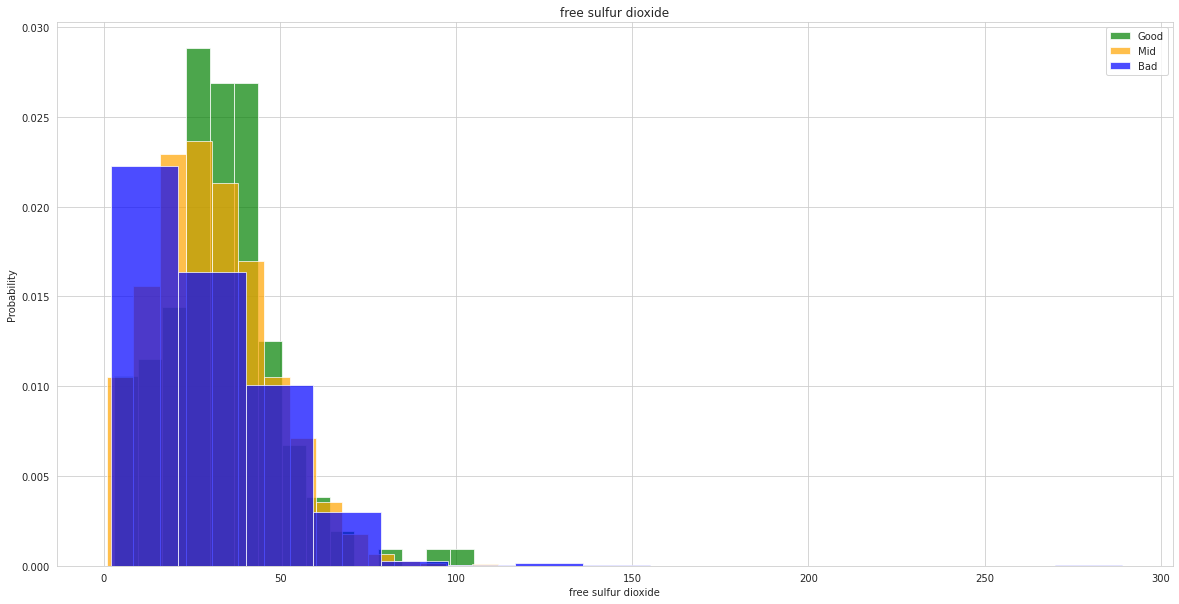

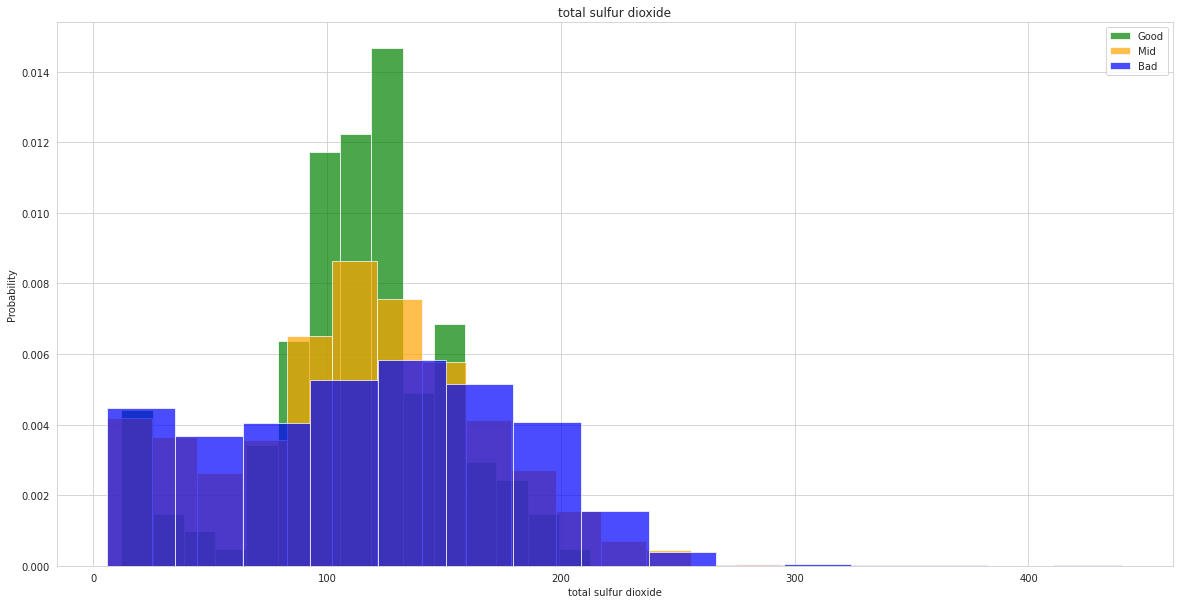

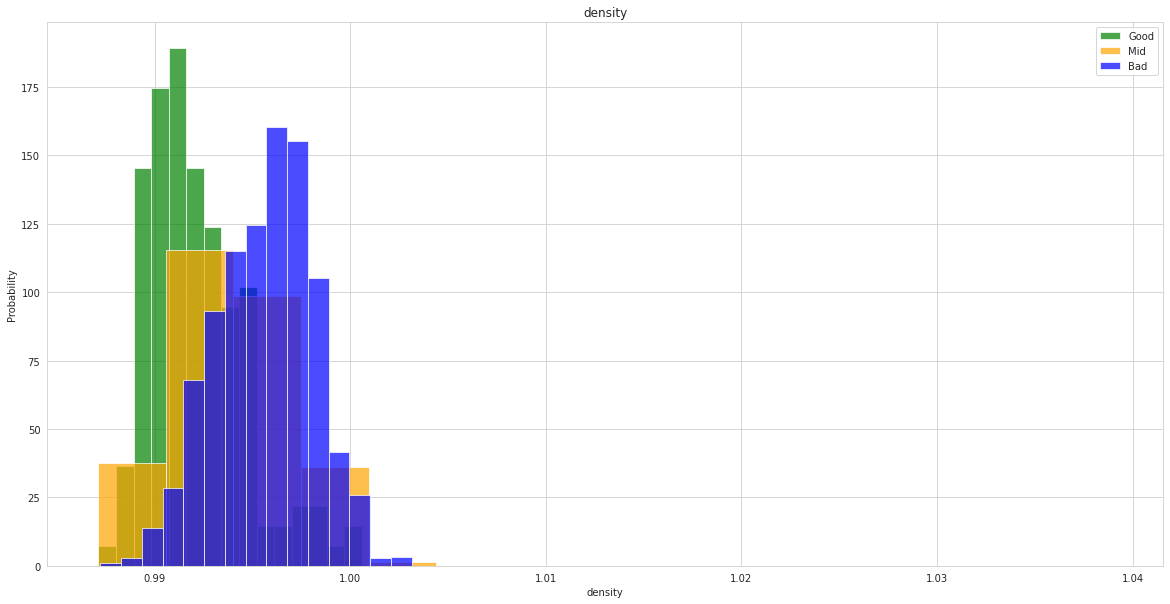

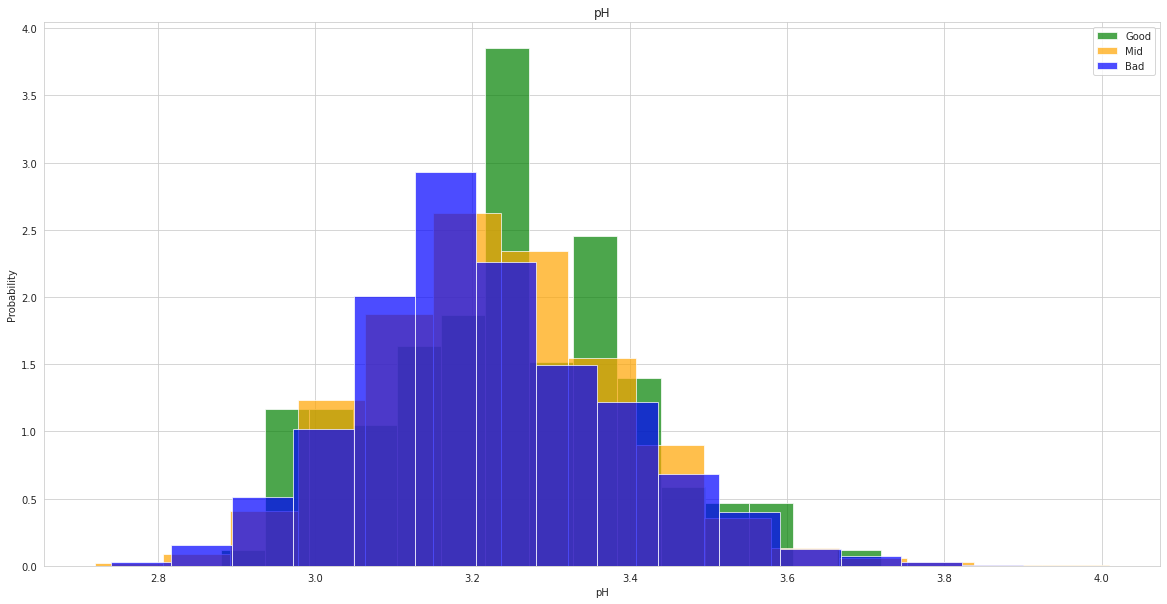

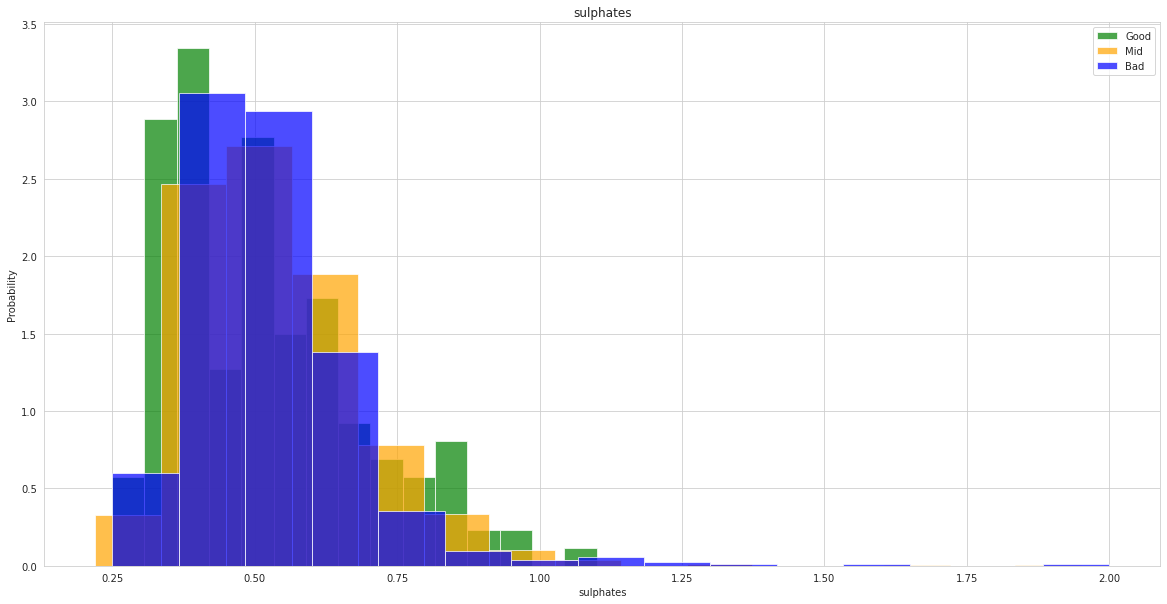

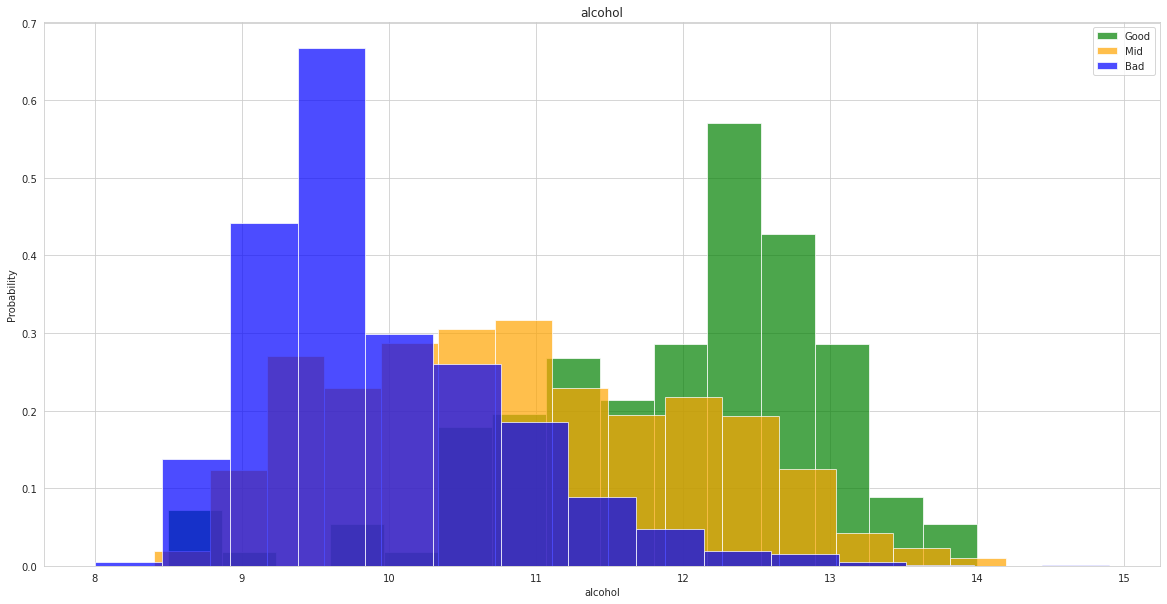

In [ ]:
for i in range(11):
  label = df.columns[i]
  plt.figure(figsize = (20, 10))
  plt.hist(df[df['target']==2][label], color='green', label="Good", 
           alpha=0.7, density=True, bins=15) # Good quality
  plt.hist(df[df['target']==1][label], color='orange', label="Mid", 
           alpha=0.7, density=True, bins=15) # Mid quality
  plt.hist(df[df['target']==0][label], color='blue', label="Bad", 
           alpha=0.7, density=True, bins=15) # Bad quality
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

<br>

<h4>Test Train Split</h4>

<p>Creating train and test dataset Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing. Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing.</p>

<br>

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)

In [ ]:
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [ ]:
train.shape

(3404, 14)

In [ ]:
test.shape

(1064, 14)

In [ ]:
val.shape

(852, 14)

In [ ]:
train_stats = train.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3404.0,7.231081,1.317668,3.80000,6.400000,7.0000,7.7000,15.90000
volatile acidity,3404.0,0.342976,0.168201,0.08000,0.230000,0.2950,0.4100,1.58000
citric acid,3404.0,0.322118,0.146161,0.00000,0.250000,0.3100,0.4000,1.23000
residual sugar,3404.0,5.087632,4.603551,0.60000,1.800000,2.7000,7.6000,65.80000
chlorides,3404.0,0.056954,0.037378,0.01200,0.038000,0.0470,0.0660,0.61000
free sulfur dioxide,3404.0,30.240159,17.830865,1.00000,17.000000,28.0000,41.0000,289.00000
total sulfur dioxide,3404.0,115.452556,56.698734,6.00000,76.000000,117.0000,155.0000,440.00000
density,3404.0,0.994574,0.003020,0.98711,0.992247,0.9947,0.9968,1.03898
pH,3404.0,3.222618,0.160929,2.72000,3.110000,3.2200,3.3300,3.81000
sulphates,3404.0,0.532089,0.151415,0.22000,0.430000,0.5100,0.6000,2.00000


In [ ]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats = train_stats.transpose()

<p>We can't get std value of the target because it's <i>categorical</i>.</p>

In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3404.0,7.231081,1.317668,3.80000,6.400000,7.0000,7.7000,15.90000
volatile acidity,3404.0,0.342976,0.168201,0.08000,0.230000,0.2950,0.4100,1.58000
citric acid,3404.0,0.322118,0.146161,0.00000,0.250000,0.3100,0.4000,1.23000
residual sugar,3404.0,5.087632,4.603551,0.60000,1.800000,2.7000,7.6000,65.80000
chlorides,3404.0,0.056954,0.037378,0.01200,0.038000,0.0470,0.0660,0.61000
free sulfur dioxide,3404.0,30.240159,17.830865,1.00000,17.000000,28.0000,41.0000,289.00000
total sulfur dioxide,3404.0,115.452556,56.698734,6.00000,76.000000,117.0000,155.0000,440.00000
density,3404.0,0.994574,0.003020,0.98711,0.992247,0.9947,0.9968,1.03898
pH,3404.0,3.222618,0.160929,2.72000,3.110000,3.2200,3.3300,3.81000
sulphates,3404.0,0.532089,0.151415,0.22000,0.430000,0.5100,0.6000,2.00000


<p>Now, we need to seperate our data as dependent and independent variables. <code>target</code> and <code>is_red</code> columns are our independent variables. Columns other than this column are dependent variables.</p> 

In [ ]:
# Function taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    target = data.pop('target')
    target = np.array(target)
    return (target, is_red)

<p>Now, we can pop independent variables from <code>test</code>, <code>train</code> and <code>val</code> dataset.

In [ ]:
train_Y = format_output(train)

In [ ]:
val_Y = format_output(val)

In [ ]:
test_Y = format_output(test)

<p>For an instance, let's take a look at <code>train</code> dataframe:</p>

In [ ]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3351,6.5,0.19,0.27,4.9,0.037,13.0,101.0,0.99160,3.17,0.41,11.8,6
1045,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
4691,6.6,0.33,0.32,15.6,0.054,62.0,227.0,0.99734,3.25,0.56,10.4,5
5177,6.0,0.16,0.36,1.6,0.042,13.0,61.0,0.99143,3.22,0.54,10.8,6
3319,6.7,0.24,0.26,12.6,0.053,44.0,182.0,0.99802,3.42,0.42,9.7,5


<p>As we can see from dataframe, there aren't any <code>is_red</code> and <code>target</code> columns. Now, for our network, we should normalize our data with the following formula:</p>

$$x_{norm} = \frac{x - \mu}{\sigma}$$


In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
norm_train_X = norm(train)
    
norm_val_X = norm(val)
    
norm_test_X = norm(test)

In [ ]:
norm_train_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3351,-0.554829,-0.909483,-0.356581,-0.040758,-0.533860,-0.966872,-0.254901,-0.984884,-0.326961,-0.806320,1.068079,0.247309
1045,1.342462,1.409172,-0.493416,-0.670707,1.258652,-1.247284,-1.665867,1.031600,0.294431,1.241037,-0.788679,-0.885719
4691,-0.478938,-0.077145,-0.014492,2.283535,-0.079043,1.781172,1.967371,0.915710,0.170153,0.184337,-0.113494,-0.885719
5177,-0.934288,-1.087841,0.259180,-0.757596,-0.400090,-0.966872,-0.960384,-1.041174,-0.016265,0.052249,0.224098,0.247309
3319,-0.403046,-0.612219,-0.424998,1.631864,-0.105797,0.771687,1.173702,1.140868,1.226519,-0.740276,-0.704281,-0.885719


<br>
<h2 align=center id="build_fit_model">Build and Fit the Model</h2>


In [ ]:
def base_model(inputs):
    
    x = tf.keras.layers.Dense(128, activation='relu', name='base_dense_1')(inputs)
    x = tf.keras.layers.Dense(128, activation='relu', name='base_dense_2')(x)
    x = tf.keras.layers.Dense(64, activation='relu', name='base_dense_3')(x)

    return x

def final_model(inputs):
    
    x = base_model(inputs)

    wine_quality = Dense(units='1', name='wine_quality')(x)
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

    print(model.summary())
    return model

In [ ]:
LR = 0.0001 #@param {type:"number"}
EPOCHS = 60 #@param {type:"number"}

In [ ]:
inputs = tf.keras.layers.Input(shape=(12,))
rms = tf.keras.optimizers.RMSprop(lr=LR)
model = final_model(inputs)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 base_dense_1 (Dense)           (None, 128)          1664        ['input_1[0][0]']                
                                                                                                  
 base_dense_2 (Dense)           (None, 128)          16512       ['base_dense_1[0][0]']           
                                                                                                  
 base_dense_3 (Dense)           (None, 64)           8256        ['base_dense_2[0][0]']           
                                                                                              

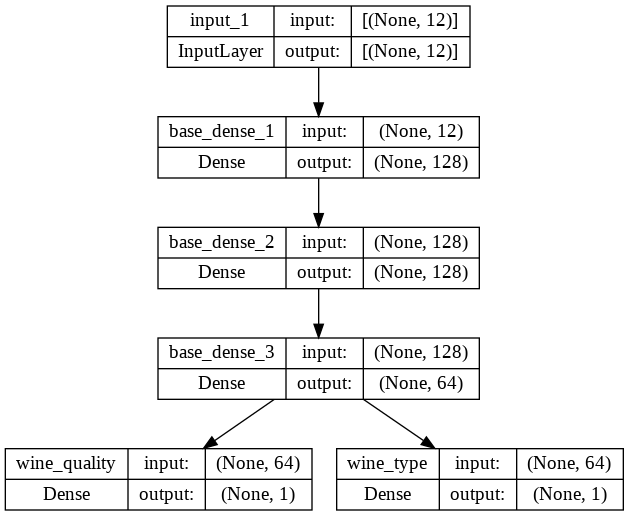

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [ ]:
model.compile(optimizer=rms, 
            loss = {'wine_type' : 'binary_crossentropy',
                  'wine_quality' : 'mean_squared_error'
                 },
            metrics = {'wine_type' : 'accuracy',
                     'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                   }
            )

In [ ]:
history = model.fit(norm_train_X, train_Y,
                    epochs = EPOCHS, validation_data=(norm_val_X, val_Y))

Epoch 1/60
107/107 [==============================] - 2s 7ms/step - loss: 0.7998 - wine_quality_loss: 0.2288 - wine_type_loss: 0.5711 - wine_quality_root_mean_squared_error: 0.4783 - wine_type_accuracy: 0.8558 - val_loss: 0.5616 - val_wine_quality_loss: 0.1192 - val_wine_type_loss: 0.4424 - val_wine_quality_root_mean_squared_error: 0.3453 - val_wine_type_accuracy: 0.9049
Epoch 2/60
107/107 [==============================] - 0s 4ms/step - loss: 0.4180 - wine_quality_loss: 0.0968 - wine_type_loss: 0.3213 - wine_quality_root_mean_squared_error: 0.3111 - wine_type_accuracy: 0.9521 - val_loss: 0.3022 - val_wine_quality_loss: 0.0802 - val_wine_type_loss: 0.2221 - val_wine_quality_root_mean_squared_error: 0.2831 - val_wine_type_accuracy: 0.9718
Epoch 3/60
107/107 [==============================] - 0s 4ms/step - loss: 0.2343 - wine_quality_loss: 0.0748 - wine_type_loss: 0.1596 - wine_quality_root_mean_squared_error: 0.2735 - wine_type_accuracy: 0.9838 - val_loss: 0.1770 - val_wine_quality_loss

In [ ]:
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

27/27 [==============================] - 0s 2ms/step - loss: 0.0186 - wine_quality_loss: 0.0065 - wine_type_loss: 0.0121 - wine_quality_root_mean_squared_error: 0.0808 - wine_type_accuracy: 0.9977


In [ ]:
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

loss: 0.018649015575647354
wine_quality_loss: 0.006527171935886145
wine_type_loss: 0.012121844105422497
wine_quality_rmse: 0.0807909145951271
wine_type_accuracy: 0.9976525902748108


<br>
<h2 align=center id="analize_model">Analize the Model</h2>

In [ ]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

34/34 [==============================] - 0s 3ms/step


In [ ]:
print(quality_pred[0])

[1.5584171]


In [ ]:
print(type_pred[0])

[0.9999957]


In [ ]:
# Function taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def plot_metrics(metric_name, title, ylim=5):
    plt.figure(figsize = (20, 10))
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [ ]:
# Function taken from 'Custom Models, Layers, and Loss Functions with TensorFlow' course.
# https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

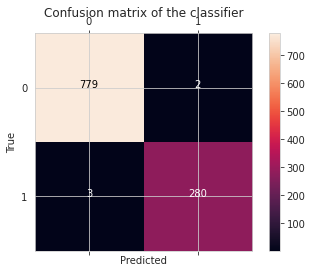

In [ ]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

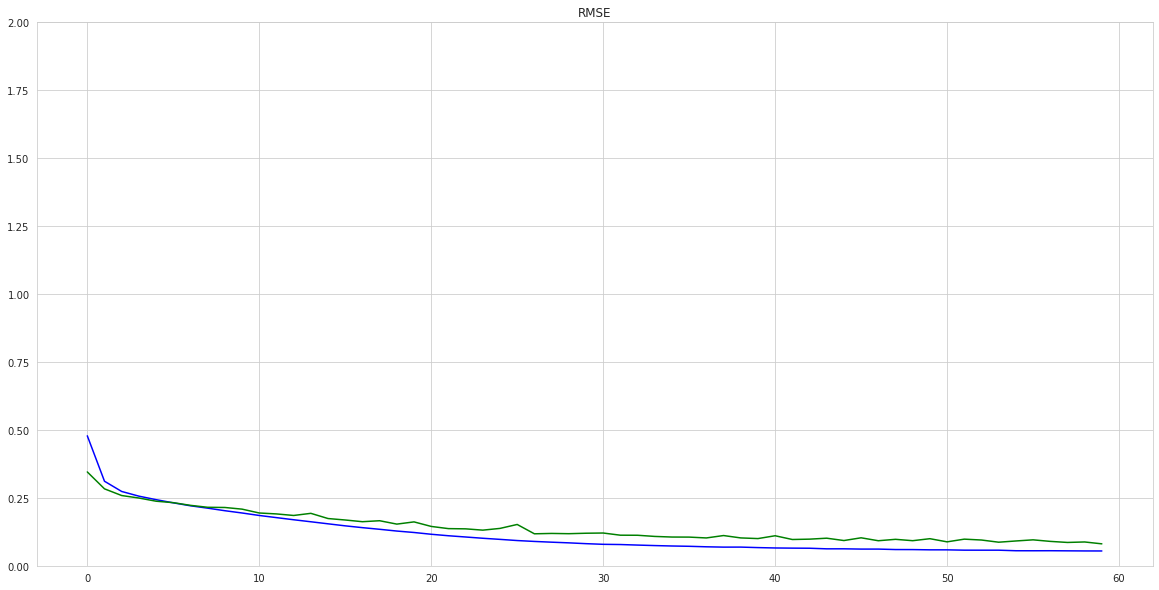

In [ ]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

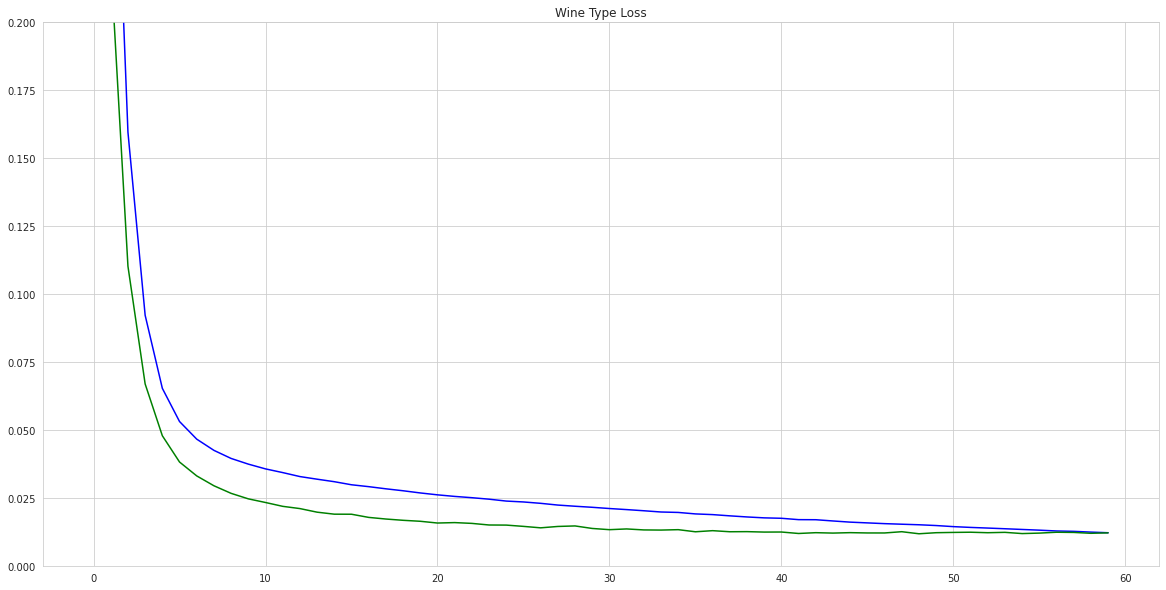

In [ ]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

<br>
<h2 align=center id="save_model">Saving the Model</h2>

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

<p>Save as .h5 file</p>

In [ ]:
model.save('my_model.h5')

<br>

<h1>Contact Me<h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [62]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-12-28 15:20:33
